# PRIMER CONTACTO CON EL DATASET   "BELGIUM TSC"

Vamos a descargar el dataset de Belgium TSC y aplicaremos una serie de algoritmos para ver su performance.

Los archivos se encuentran en: http://btsd.ethz.ch/shareddata/  
Este dataset contiene 62 clases (62 tipos de señales).  
Descargamos dos archivos:  
+ BelgiumTSC_Training 
+ BelgiumTSC_Testing  

Los archivos deben descomprimirse. Cada archivo está organizado por carpetas con el tipo de clases. Hay 62 carpetas definidas numericamente entre 00000 y 00061.  
Cada carpeta contiene un determinado número de archivos .ppm (imágenes) y un archivo .csv .  

Intentamos seguir los pasos del artículo de Waleed Abdulla en medium: https://medium.com/@waleedka/traffic-sign-recognition-with-tensorflow-629dffc391a6  
El notebook original de jupyter está en github:  
https://github.com/waleedka/traffic-signs-tensorflow

In [1]:
import os
import random
import skimage.data
import skimage.transform
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import csv

# Allow image embeding in notebook
%matplotlib inline

## UPLOAD DATASET

Vamos a subir el dataset a una Python list.

In [2]:
def load_data(data_dir):
    directories = [d for d in os.listdir(data_dir) 
                   if os.path.isdir(os.path.join(data_dir, d))]

    labels = []
    images = []
    for d in directories:
        label_dir = os.path.join(data_dir, d)
        file_names = [os.path.join(label_dir, f) 
                      for f in os.listdir(label_dir) if f.endswith(".ppm")]
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(int(d))
    
    return labels, images

In [3]:
train_data_dir = ".\\data\\Training"            
labels, images = load_data(train_data_dir)

### EXPLORANDO EL DATASET

Hemos importado el dataset en una lista de Python de 4575 instancias.  
Cada instancia es un array de 3 dimensiones.  
Las dos primeras dimensiones son el número de pixels en X e Y.  
La tercra dimensión es siempre 3 y se trata del color en RGB.

In [5]:
print("Nº de imágenes TOTALES: ", len(labels))

Nº de imágenes TOTALES:  4575


In [16]:
a=images[0]
print('Dimensiones de la primera imagen: ',a.shape)
print('Parametros RGB del primer píxel: ', a[0,0])

Dimensiones de la primera imagen:  (141, 142, 3)
Parametros RGB del primer píxel:  [210 249 232]


In [13]:
a

array([[[210, 249, 232],
        [204, 249, 208],
        [197, 198, 155],
        ...,
        [ 51,  60,  40],
        [ 54,  64,  44],
        [ 57,  66,  46]],

       [[209, 250, 236],
        [212, 255, 217],
        [200, 196, 156],
        ...,
        [ 49,  57,  38],
        [ 51,  59,  41],
        [ 53,  60,  42]],

       [[203, 246, 236],
        [207, 246, 213],
        [202, 192, 156],
        ...,
        [ 47,  53,  35],
        [ 48,  54,  36],
        [ 48,  55,  37]],

       ...,

       [[  2,  22,  25],
        [ 26,  56,  77],
        [ 71, 140, 159],
        ...,
        [ 84,  77,  50],
        [ 68,  66,  41],
        [ 56,  64,  44]],

       [[  0,  22,  32],
        [ 30,  75, 106],
        [ 87, 176, 198],
        ...,
        [ 86,  80,  52],
        [ 68,  66,  41],
        [ 55,  63,  42]],

       [[  0,  32,  50],
        [ 42, 101, 135],
        [121, 217, 239],
        ...,
        [ 87,  80,  52],
        [ 70,  68,  43],
        [ 58,  66,  46]]

In [6]:
def display_images_and_labels(images,labels):
    unique_labels = set(labels)
    plt.figure(figsize=(15, 15))
    i = 1
    for label in unique_labels:
        image = images[labels.index(label)]
        plt.subplot(8, 8, i)
        plt.axis('off')
        plt.title("Label {0} ({1})".format(label, labels.count(label)))
        i += 1
        _ = plt.imshow(image)
    
    plt.show()

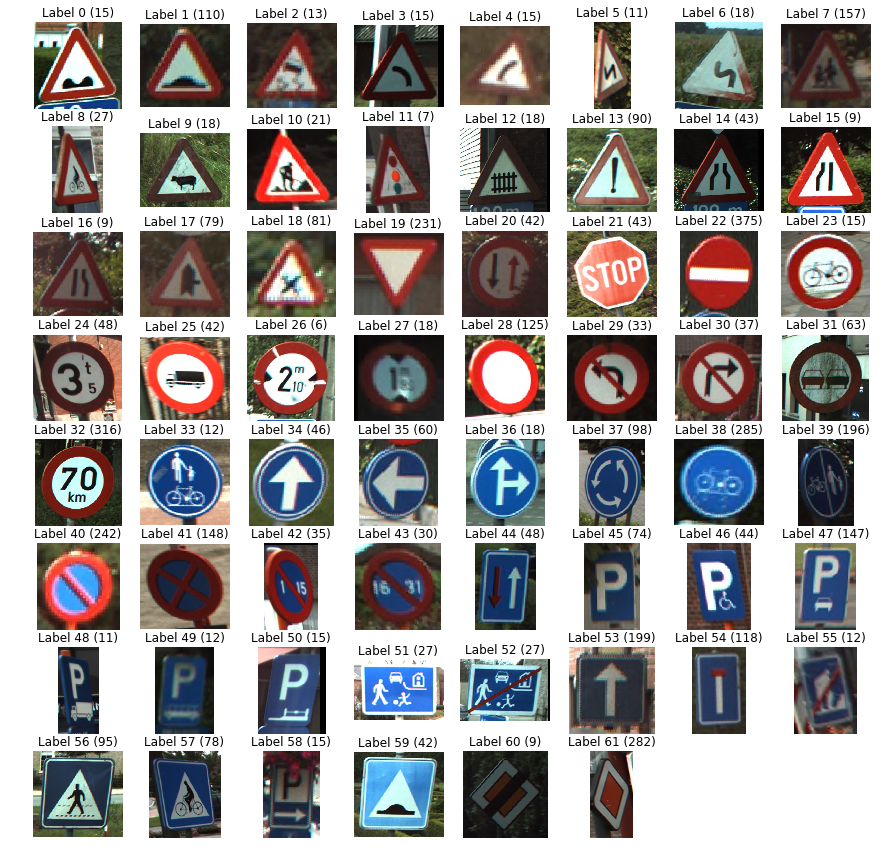

In [7]:
display_images_and_labels(images,labels)

Podemos extraer las siguientes conclusiones:  
+ Tenemos 61 categorias.
+ El número de ejemplos por categoria es muy dispar
+ Las imágenes están muy bien encuadradas
+ No todas las imágenes tienen el mismo tamaño
+ La calidad de alguna de las imágenes deja que desear

A primera vista vemos que el número de imágenes por categoria es muy dispar, pero exactamente cuantas imágenes por categorai hay.  
Vamos a plotear un grafico con el nº de imágnes por categoria.

### Nº DE IMÁGNES POR CATEGORIA

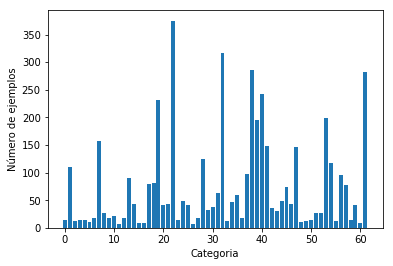

In [12]:
unique_labels = set(labels)
#creamos una lista
labels_count_y=[]
labels_count_x=[]

#con un for recorremos todas las categorias y metemos el número de imágenes
#en cada categoria en la lista labels_count
for i in unique_labels:
    labels_count_y.append(labels.count(i))
    if labels.count(i) != 0:
        labels_count_x.append(i)
    
#ploteamos esta lista como diagrama
#print('labels_count_x',labels_count_x)
#print(len(labels_count_x))
#print('labels_count_y',labels_count_y)
#print(len(labels_count_y))
x=list(range(61))
plt.bar(labels_count_x,labels_count_y)
plt.xlabel('Categoria')
plt.ylabel('Número de ejemplos')
plt.show()

Efectivamente algunas categorias parece que estan subrepresentadas.

In [13]:
def display_categorias_menores_de_X(cat):
    unique_labels = set(labels)
    #creamos una lista
    labels_count_y=[]
    labels_count_x=[]
    images_count=[]

    #con un for recorremos todas las categorias y metemos el número de imágenes
    #en cada categoria en la lista labels_count
    x=0
    for i in unique_labels:
        if labels.count(i) < cat:
            labels_count_y.append(labels.count(i))
            labels_count_x.append(i)

    #x=list(range(61))
    plt.bar(labels_count_x,labels_count_y)
    plt.xlabel('Categoria')
    plt.ylabel('Número de ejemplos')
    plt.title('CATEGORIAS CON MENOS DE '+str(cat)+' IMAGENES')
    plt.show()

    print('\n CATEGORIAS CON MENOS DE ',str(cat),' IMAGENES: ',labels_count_x)
    print('\n HAY UN TOTAL DE ',len(labels_count_x),'CATEGORIAS CON MENOS DE ',str(cat),'IMAGENES')
    
    plt.figure(figsize=(15, 15))
    i = 1
    for label in labels_count_x:
        image = images[labels.index(label)]
        plt.subplot(8, 8, i)
        plt.axis('off')
        plt.title("Label {0} ({1})".format(label, labels.count(label)))
        i += 1
        _ = plt.imshow(image)
    
    plt.show()

Vamos a ver las categorias con menos de 50 imágenes

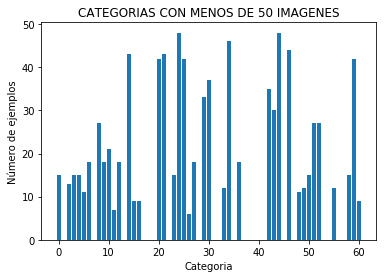


 CATEGORIAS CON MENOS DE  50  IMAGENES:  [0, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 14, 15, 16, 20, 21, 23, 24, 25, 26, 27, 29, 30, 33, 34, 36, 42, 43, 44, 46, 48, 49, 50, 51, 52, 55, 58, 59, 60]

 HAY UN TOTAL DE  39 CATEGORIAS CON MENOS DE  50 IMAGENES


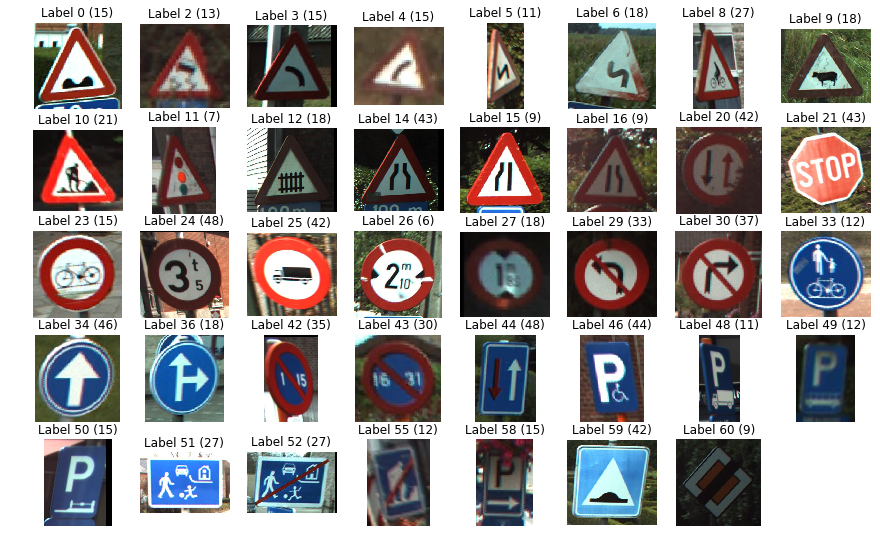

In [14]:
display_categorias_menores_de_X(cat=50)

Categorias con menos de 20 imágenes

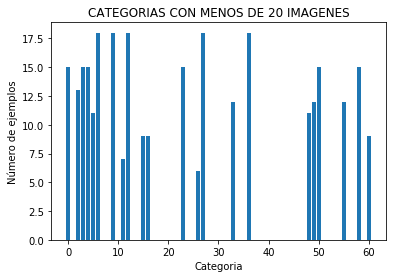


 CATEGORIAS CON MENOS DE  20  IMAGENES:  [0, 2, 3, 4, 5, 6, 9, 11, 12, 15, 16, 23, 26, 27, 33, 36, 48, 49, 50, 55, 58, 60]

 HAY UN TOTAL DE  22 CATEGORIAS CON MENOS DE  20 IMAGENES


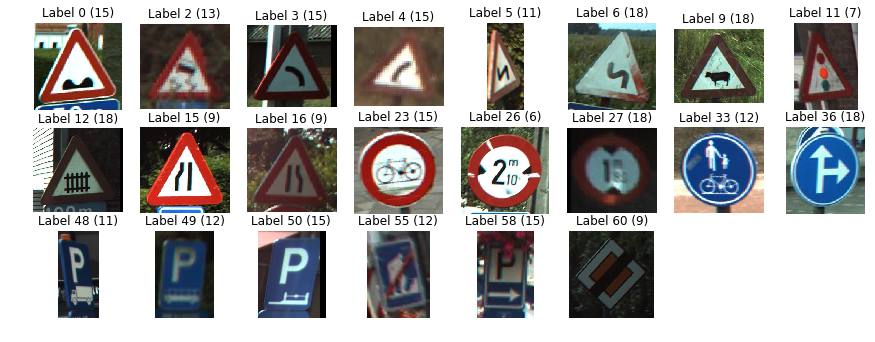

In [15]:
display_categorias_menores_de_X(cat=20)

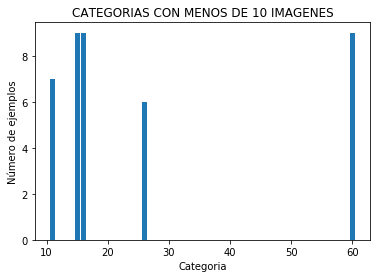


 CATEGORIAS CON MENOS DE  10  IMAGENES:  [11, 15, 16, 26, 60]

 HAY UN TOTAL DE  5 CATEGORIAS CON MENOS DE  10 IMAGENES


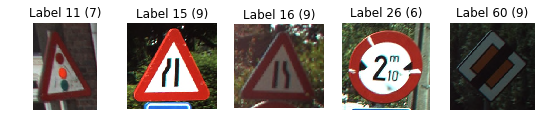

In [16]:
display_categorias_menores_de_X(cat=10)

Vemos que hay algunas categorias muy poco representadas.
##### <font color='red'> @CUARTAS </font>
###### <font color='red'>HAY QUE AVERIGUAR EN QUE PUEDE AFECTAR A NUESTRO MODELO ESTE HECHO. </font>


### ANÁLISIS POR CATEGORIAS

In [17]:
def display_label_images(images, label, salto):
    #AÑADO UNA PEQUEÑA MODIFICACIÓN AL CÓDIGO DE W.A.
    #CON EL ARGUMENTO SALTO PODEMOS ABARCAR NO SOLO LAS 32 PRIMERAS IMÁGENES
    """Display images of a specific label."""
    limit = 24  # show a max of 24 images
    plt.figure(figsize=(15, 5))
    i = 1

    start = labels.index(label)
    end = start + labels.count(label)
    for c in range(start,end,salto):
        plt.subplot(3, 8, i)  # 3 rows, 8 per row
        plt.axis('off')
        i += 1
        image=images[c]
        plt.imshow(image)
    plt.show()

En la categoria 32, tenemos  316 ejemplos.


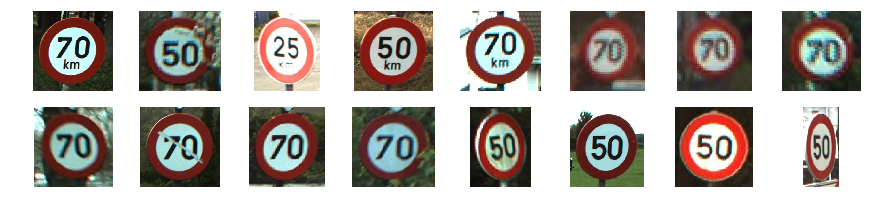

In [18]:
print('En la categoria 32, tenemos ', labels.count(32), 'ejemplos.')
display_label_images(images, label=32, salto=20)

HAY QUE DESTECAR QUE TODAS LAS IMÁGENES CON LÍMITE DE VELOCIDAD SE METEN EN LA MISMA CATEGORIA

En la categoria 23, tenemos  15 ejemplos.


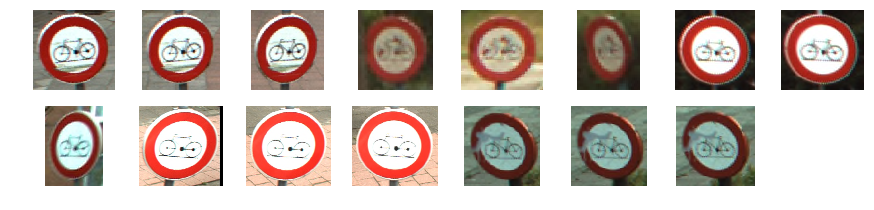

In [19]:
print('En la categoria 23, tenemos ', labels.count(23), 'ejemplos.')
display_label_images(images, label=23, salto=1)

EN ESTA CATEGORIA VEMOS QUE HAY ALGUNAS IMÁGENES MUY BORROSAS

En la categoria 24, tenemos  48 ejemplos.


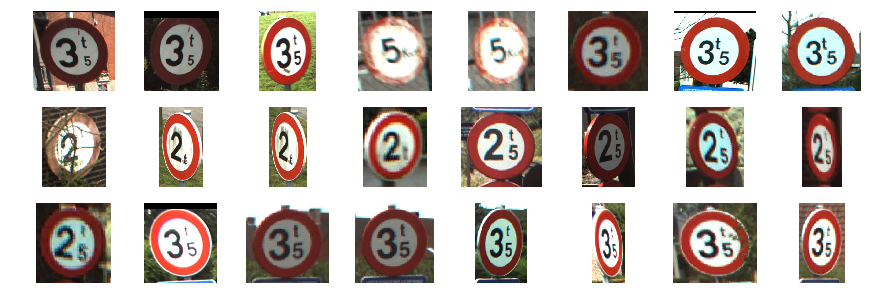

In [20]:
print('En la categoria 24, tenemos ', labels.count(24), 'ejemplos.')
display_label_images(images, label=24, salto=2)

En la categoria 27, tenemos  18 ejemplos.


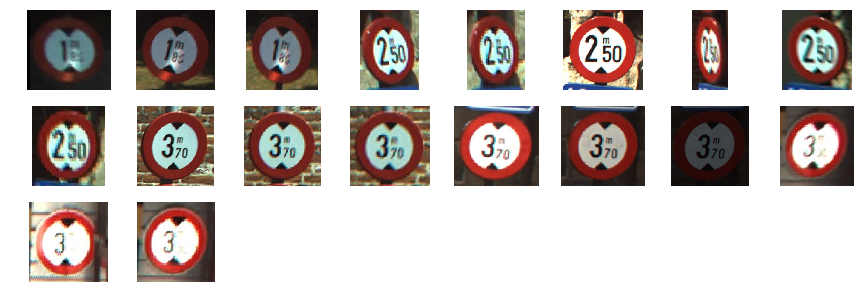

In [21]:
print('En la categoria 27, tenemos ', labels.count(27), 'ejemplos.')
display_label_images(images, label=27, salto=1)

HABRA QUE TENER CUIDADO CON LAS CATEGORIAS 24 Y 27

## "RESIZING" DE LAS IMÁGENES

Necesitamos que todas las imágenes tengan el mismo tamaño. Vamos a ver que tamaños tienen nuestras imágenes origianles.

In [22]:
images_shape=[]

for image in images:
    images_shape.append(image.shape)

#print(images_shape)

print('El tamaño máximo de nuestras imágenes es: ', max(images_shape))
print('El tamaño mínimo de nuestras imágenes es: ', min(images_shape))

El tamaño máximo de nuestras imágenes es:  (724, 335, 3)
El tamaño mínimo de nuestras imágenes es:  (22, 21, 3)


D:\ANACONDA\envs\tensorflow\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


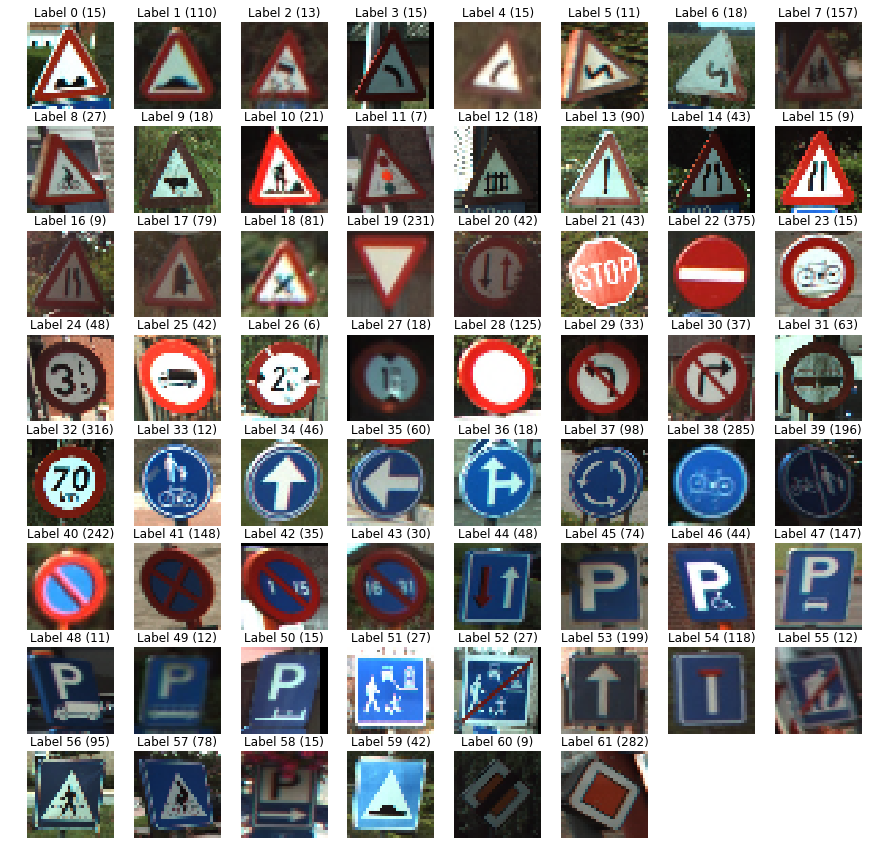

In [23]:
# Resize images
images32 = [skimage.transform.resize(image, (32, 32))
                for image in images]
display_images_and_labels(images32, labels)

Vemos las imágenes más pixeladas, pero ahora todas tienen el mismo tamaño.

In [24]:
images32_shape=[]

for image in images32:
    images32_shape.append(image.shape)

#print(images_shape)

print('El tamaño máximo de nuestras imágenes es: ', max(images32_shape))
print('El tamaño mínimo de nuestras imágenes es: ', min(images32_shape))

El tamaño máximo de nuestras imágenes es:  (32, 32, 3)
El tamaño mínimo de nuestras imágenes es:  (32, 32, 3)


Otro tema importante es que los valores RGB varian entre 0 y 255 para nuestros modelos nos interesa que estén normalizados entre 0 y 1.

In [25]:
print('Las 5 primeras imágenes originales tienen los siguientes valores max y min de RGB: ')
i=1
for image in images[:5]:
    print('Valor max de la imagen',i, image.max())
    print('Valor min de la imagen',i, image.min())
    i += i

Las 5 primeras imágenes originales tienen los siguientes valores max y min de RGB: 
Valor max de la imagen 1 255
Valor min de la imagen 1 0
Valor max de la imagen 2 255
Valor min de la imagen 2 0
Valor max de la imagen 4 255
Valor min de la imagen 4 0
Valor max de la imagen 8 255
Valor min de la imagen 8 7
Valor max de la imagen 16 255
Valor min de la imagen 16 0


Una vez hemos modificado el tamaño de las imágenes nos queda de la siguiente manera

In [26]:
print('Las 5 primeras imágenes modificadas tienen los siguientes valores max y min de RGB: ')
i=1
for image in images32[:5]:
    print('Valor max de la imagen',i, image.max())
    print('Valor min de la imagen',i, image.min())
    i+=i

Las 5 primeras imágenes modificadas tienen los siguientes valores max y min de RGB: 
Valor max de la imagen 1 1.0
Valor min de la imagen 1 0.0073912377450982
Valor max de la imagen 2 1.0
Valor min de la imagen 2 0.003576899509804572
Valor max de la imagen 4 1.0
Valor min de la imagen 4 0.0015567555147058805
Valor max de la imagen 8 0.969267003676469
Valor min de la imagen 8 0.056774662990195915
Valor max de la imagen 16 0.9895220588235292
Valor min de la imagen 16 0.026654411764708223


Vemos que los valores RGB se han normalizado

## CONVIRTIENDO EL DATASET A ND-ARRAY

In [27]:
def convert_to_ndarray(X):
    Z=np.ndarray(shape=(len(X),len(X[0]),len(X[0]),3))
    for m in range (len(X)):
        a=X[0]
        for y in range(len(X[0])):
            for x in range(len(X[0])):
                for c in range(3):
                    Z[m,y,x,c]=a[y,x,c]
    return Z

In [33]:
X_train=convert_to_ndarray(images32)
print(X_train[:10])

In [30]:
def convert_to_one_hot(Y, C):
    Z=np.zeros((len(Y),C))
    for i in range(len(Y)):
        Z[i,Y[i]] = 1
    return Z

In [32]:
#Convert training and test labels to one hot matrices
Y_train=convert_to_one_hot(labels,len(set(labels)))
print(Y_train)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


##### <font color='red'> @CUARTAS </font>
¿SI CONVIERTO EL LABELS A ONE-HOT TENGO QUE CONVERTIR TAMBIÉN EL IMAGES?
EN PRINCIPIO NO HARÍA FALTA ¿NO?